In [1]:
# Дана статистика пользователей adult.csv.
# Получите значения AUC для различных моделей и их параметров.

In [2]:
import pandas as pd

In [3]:
# мпортируем исходные данные
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
# разбиваю данные на data и target
y = df.income
X = df.drop(['income'],axis =1)

In [5]:
# обработка категориальных переменных для  data
cat_features = ['workclass', 'education','marital-status','occupation', 
                'relationship', 'race', 'gender','native-country']
X = pd.get_dummies(X, columns = cat_features)

In [6]:
# импортируем метод для автоматической разбивки на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

In [7]:
# обрабаываю категориальную переменную при помощи  Label Encoder'а 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit( df['income'] )
y = pd.Series(le.transform( df['income'] ) )

In [8]:
# разбиваю данные на тренировочные данные и тестовые
train_X, test_X, train_y, test_y = train_test_split(X,y)

In [9]:
#  подбираю лучшие фичи
from sklearn.ensemble import RandomForestClassifier

/home/dmitry/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [10]:
forest = RandomForestClassifier()
forest.fit(train_X,train_y)

imp = pd.Series(forest.feature_importances_)
imp = imp.sort_values(ascending=False)

imp = imp[:10]
#print(imp)
#print(train_X.columns[imp.index])

labels = [train_X.columns[imp.index]]
labels

[Index(['fnlwgt', 'age', 'capital-gain', 'hours-per-week',
        'marital-status_Married-civ-spouse', 'educational-num',
        'relationship_Husband', 'capital-loss', 'marital-status_Never-married',
        'gender_Male'],
       dtype='object')]

In [11]:
labels = ['fnlwgt', 'age', 'capital-gain', 'marital-status_Married-civ-spouse',
        'hours-per-week', 'educational-num', 'relationship_Husband',
        'capital-loss', 'education_Bachelors', 'occupation_Exec-managerial']

In [12]:
_X = X[labels]

In [13]:
# разбиваю на тестовую и тренировочную выборки
train_X, test_X, train_y, test_y = train_test_split(_X,y)

In [14]:
#  будем сторить логистическую регрессию
from sklearn.linear_model import LogisticRegression

In [15]:
#  обучаю модель
lr = LogisticRegression()
lr.fit(train_X,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
# получаю результат
lr.score(test_X,test_y)

0.7996069118008353

In [17]:
# метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [18]:
# получаю вероятности для предикта
predictions = lr.predict_proba( test_X )

In [19]:
pr, re, thres = precision_recall_curve( test_y, predictions[:, 1] )

In [20]:
for line in zip( pr, re, thres ):
    print( line )

(0.23704918032786884, 1.0, 0.01727805279690607)
(0.23698663824903682, 0.9996542185338866, 0.01895835360576349)
(0.23700606656828987, 0.9996542185338866, 0.019146236120981715)
(0.2369435106993523, 0.9993084370677732, 0.019154836248189252)
(0.23696293866841586, 0.9993084370677732, 0.019217700970818725)
(0.23698236982369825, 0.9993084370677732, 0.024671843471426477)
(0.23691979662128915, 0.9989626556016598, 0.02489458982390128)
(0.23685721315508898, 0.9986168741355463, 0.025655421823620555)
(0.2368766404199475, 0.9986168741355463, 0.026323328419346554)
(0.23689607087195472, 0.9986168741355463, 0.026595509827908186)
(0.236915504511895, 0.9986168741355463, 0.026599915074273187)
(0.23693494134055296, 0.9986168741355463, 0.02688159552780435)
(0.2369543813587135, 0.9986168741355463, 0.02733985908917376)
(0.23697382456716173, 0.9986168741355463, 0.027928374239690967)
(0.23699327096668307, 0.9986168741355463, 0.028765114218662253)
(0.2370127205580632, 0.9986168741355463, 0.03025604504148365)
(0.

(0.23742277140335394, 0.9301521438450899, 0.1184849784697509)
(0.23744372848442052, 0.9301521438450899, 0.11853106019222666)
(0.2374646892655367, 0.9301521438450899, 0.11853958741396263)
(0.23748565374768252, 0.9301521438450899, 0.11860032787501826)
(0.23750662193183825, 0.9301521438450899, 0.11868422811159128)
(0.23743929359823399, 0.9298063623789765, 0.11869739945635845)
(0.23746026139173437, 0.9298063623789765, 0.11870142936891721)
(0.2373929170714475, 0.9294605809128631, 0.11874798900046964)
(0.237413884472708, 0.9294605809128631, 0.11877335038708389)
(0.23743485557812913, 0.9294605809128631, 0.11881403992026186)
(0.23745583038869258, 0.9294605809128631, 0.11882950105612179)
(0.2373884618782578, 0.9291147994467497, 0.11885732668871625)
(0.2374094362961654, 0.9291147994467497, 0.11888174634765544)
(0.2374304144207829, 0.9291147994467497, 0.11890492488959076)
(0.2373630258041711, 0.9287690179806363, 0.11895719322168963)
(0.23738400353513037, 0.9287690179806363, 0.11900457598074493)
(

(0.24247119202091605, 0.8658367911479945, 0.15662556563738678)
(0.24249467363935695, 0.8658367911479945, 0.1566289020441617)
(0.2425181598062954, 0.8658367911479945, 0.15663010294811652)
(0.24244478884153428, 0.8654910096818811, 0.15676990964556803)
(0.24237140366172624, 0.8651452282157677, 0.15677107282763353)
(0.24239488471226506, 0.8651452282157677, 0.15681532995094094)
(0.24241837031295418, 0.8651452282157677, 0.15689726133810203)
(0.2424418604651163, 0.8651452282157677, 0.15700932292386408)
(0.24246535517007461, 0.8651452282157677, 0.15702205197305763)
(0.24239193642178716, 0.8647994467496543, 0.15703440384453585)
(0.2424154308422991, 0.8647994467496543, 0.15707936572349435)
(0.24243892981775883, 0.8647994467496543, 0.1570853950547855)
(0.24246243334949102, 0.8647994467496543, 0.15711610166569892)
(0.24248594143882102, 0.8647994467496543, 0.15718023693823668)
(0.24250945408707456, 0.8647994467496543, 0.15721728212648933)
(0.24253297129557796, 0.8647994467496543, 0.1572409424380847

(0.24654155495978552, 0.7949515905947441, 0.1856184707662583)
(0.24656799656799658, 0.7949515905947441, 0.18566505941414507)
(0.2464871822374772, 0.7946058091286307, 0.1857021339178072)
(0.24651362368590432, 0.7946058091286307, 0.1857425200111407)
(0.24643278618174017, 0.7942600276625172, 0.18579242717087424)
(0.24645922746781115, 0.7942600276625172, 0.18583695150971818)
(0.24648567442858677, 0.7942600276625172, 0.18585519577584544)
(0.2464048078986907, 0.7939142461964038, 0.18594022159741447)
(0.2464312546957175, 0.7939142461964038, 0.1859493660637915)
(0.24645770717045942, 0.7939142461964038, 0.1860659269514177)
(0.24648416532474504, 0.7939142461964038, 0.18609163101840784)
(0.24640326390380074, 0.7935684647302904, 0.18609713123123398)
(0.24642972189412649, 0.7935684647302904, 0.18610013650165566)
(0.24645618556701032, 0.7935684647302904, 0.18610137915652727)
(0.24648265492428312, 0.7935684647302904, 0.1861065123852362)
(0.24650912996777657, 0.7935684647302904, 0.18617800936799242)
(

(0.25069069069069067, 0.7216459197786999, 0.20520213466245318)
(0.25072080730418067, 0.7216459197786999, 0.20523213804772072)
(0.25075093115463176, 0.7216459197786999, 0.2052395815947143)
(0.25078106224465274, 0.7216459197786999, 0.20524089246878377)
(0.25081120057685374, 0.7216459197786999, 0.20525266842646112)
(0.2508413461538462, 0.7216459197786999, 0.20525712395752482)
(0.25075129222262293, 0.7213001383125864, 0.20526720417178476)
(0.25078143784563595, 0.7213001383125864, 0.20528168696082075)
(0.2508115907178069, 0.7213001383125864, 0.20529110085874552)
(0.25084175084175087, 0.7213001383125864, 0.2052923296816875)
(0.2507516536380036, 0.720954356846473, 0.20533743557849493)
(0.25078181380803466, 0.720954356846473, 0.20534146374173656)
(0.2508119812342115, 0.720954356846473, 0.20535679171501678)
(0.25084215591915304, 0.720954356846473, 0.2053641498136469)
(0.25087233786547947, 0.720954356846473, 0.20539137660942247)
(0.2509025270758123, 0.720954356846473, 0.20539683730086145)
(0.250

(0.2577631217367409, 0.648686030428769, 0.22138849945116026)
(0.25779854335577845, 0.648686030428769, 0.2213910967620226)
(0.25783397471137987, 0.648686030428769, 0.2214085610194799)
(0.2578694158075601, 0.648686030428769, 0.2214127085645561)
(0.25776739070662635, 0.6483402489626556, 0.22143959651612588)
(0.2578028323937852, 0.6483402489626556, 0.22145418002836448)
(0.25783828382838286, 0.6483402489626556, 0.22146159475499932)
(0.25787374501444094, 0.6483402489626556, 0.2214712525763735)
(0.2579092159559835, 0.6483402489626556, 0.22147687062295807)
(0.25794469665703673, 0.6483402489626556, 0.2215035247638618)
(0.25798018712162907, 0.6483402489626556, 0.22151920729799718)
(0.2580156873537911, 0.6483402489626556, 0.22152505103494288)
(0.25791357005229837, 0.6479944674965422, 0.22154480731660356)
(0.2578114246386786, 0.6476486860304288, 0.22154993169472043)
(0.25784691629955947, 0.6476486860304288, 0.22155535098677495)
(0.25788241773371884, 0.6476486860304288, 0.2215559832748789)
(0.25791

(0.2683852601613158, 0.5867911479944675, 0.2364480478481381)
(0.268269534957292, 0.5864453665283541, 0.2364753802051402)
(0.2681537731371618, 0.5860995850622407, 0.23653704311528398)
(0.26819620253164556, 0.5860995850622407, 0.2365445347420774)
(0.26808039246716253, 0.5857538035961273, 0.2365627937734438)
(0.26812282367837925, 0.5857538035961273, 0.23660864531794806)
(0.2681652683235713, 0.5857538035961273, 0.23662411302556474)
(0.2682077264091197, 0.5857538035961273, 0.23662646105040783)
(0.26825019794140936, 0.5857538035961273, 0.23663840444517342)
(0.2682926829268293, 0.5857538035961273, 0.23664767743122678)
(0.26833518137177254, 0.5857538035961273, 0.23665591837547337)
(0.2683776932826363, 0.5857538035961273, 0.2366707485329786)
(0.2684202186658216, 0.5857538035961273, 0.23667209542238543)
(0.2683042789223455, 0.5854080221300139, 0.23669621483062184)
(0.268188302425107, 0.5850622406639004, 0.23669829538093662)
(0.2682308180088776, 0.5850622406639004, 0.2367193298121926)
(0.26811479

(0.29081731702582025, 0.5179806362378977, 0.26071418134188173)
(0.290873786407767, 0.5179806362378977, 0.2607358966891626)
(0.29093027772382984, 0.5179806362378977, 0.2607555036205106)
(0.290986790986791, 0.5179806362378977, 0.2607812516163662)
(0.29084903827472314, 0.5176348547717843, 0.26082522584826745)
(0.29090555771472987, 0.5176348547717843, 0.26082779314072013)
(0.29076773566569486, 0.5172890733056709, 0.2608318049637287)
(0.29082426127527217, 0.5172890733056709, 0.26087412796904363)
(0.29088080886642037, 0.5172890733056709, 0.26087883291119385)
(0.2907429015947102, 0.5169432918395575, 0.2609191461027582)
(0.2907994553588796, 0.5169432918395575, 0.26093309584189633)
(0.2908560311284047, 0.5169432918395575, 0.2609584554160984)
(0.29071803852889666, 0.516597510373444, 0.2610049568181723)
(0.29077462047489294, 0.516597510373444, 0.26104329444051927)
(0.29083122445006815, 0.516597510373444, 0.2610932260001899)
(0.2908878504672897, 0.516597510373444, 0.2611067509056869)
(0.2909444985

(0.30754979157017137, 0.45919778699861685, 0.2809765428546927)
(0.3073893907806347, 0.45885200553250344, 0.28102660148294634)
(0.3072289156626506, 0.45850622406639, 0.281030740312688)
(0.3070683661645423, 0.4581604426002766, 0.28103085699478764)
(0.30713954566527585, 0.4581604426002766, 0.2810768569604687)
(0.3069789009969859, 0.4578146611341632, 0.2810797256439088)
(0.3070500927643785, 0.4578146611341632, 0.2810974327360862)
(0.30712131755973093, 0.4578146611341632, 0.28111140256896283)
(0.3071925754060325, 0.4578146611341632, 0.2812101542180485)
(0.3070317939197029, 0.4574688796680498, 0.2812137180732697)
(0.3071030640668524, 0.4574688796680498, 0.2812370381681493)
(0.3071743673090318, 0.4574688796680498, 0.2812434496521791)
(0.30724570366929865, 0.4574688796680498, 0.2812606342753834)
(0.30708478513356563, 0.45712309820193636, 0.2812718512674442)
(0.30715613382899626, 0.45712309820193636, 0.2812806051544516)
(0.30699511968394144, 0.45677731673582295, 0.2812892279440046)
(0.307066480

(0.3491628614916286, 0.3966113416320885, 0.3062520312470768)
(0.3492691839220463, 0.3966113416320885, 0.3062651329392385)
(0.349375571123972, 0.3966113416320885, 0.30628522120520485)
(0.3491773308957952, 0.3962655601659751, 0.3062911501894813)
(0.3492837549527583, 0.3962655601659751, 0.3062956697187255)
(0.349390243902439, 0.3962655601659751, 0.3062961900758206)
(0.3494967978042086, 0.3962655601659751, 0.3062983989107141)
(0.34960341671751066, 0.3962655601659751, 0.30635627414692873)
(0.3497101007018615, 0.3962655601659751, 0.3063638791263468)
(0.3498168498168498, 0.3962655601659751, 0.30636664387391704)
(0.3499236641221374, 0.3962655601659751, 0.30647035159183217)
(0.3500305436774588, 0.3962655601659751, 0.3065029794901409)
(0.35013748854262144, 0.3962655601659751, 0.3065415521261534)
(0.35024449877750613, 0.3962655601659751, 0.30658822730463703)
(0.35035157444206666, 0.3962655601659751, 0.30660396770806525)
(0.35015290519877673, 0.39591977869986167, 0.30679553870550197)
(0.3499541144

(0.4838204592901879, 0.32053941908713696, 0.36363264103862214)
(0.4840731070496084, 0.32053941908713696, 0.3636337031170476)
(0.4843260188087774, 0.32053941908713696, 0.36366484439306385)
(0.48457919498170415, 0.32053941908713696, 0.36382805166357896)
(0.4848326359832636, 0.32053941908713696, 0.3638681546056269)
(0.4850863422291994, 0.32053941908713696, 0.36387664358340893)
(0.4848167539267016, 0.3201936376210235, 0.3640497630126061)
(0.4850707176532216, 0.3201936376210235, 0.3640982104746474)
(0.48532494758909855, 0.3201936376210235, 0.36412615624655154)
(0.4855794441531201, 0.3201936376210235, 0.36417152343078507)
(0.48530954879328436, 0.31984785615491007, 0.36418691420506866)
(0.48556430446194226, 0.31984785615491007, 0.3641959361310305)
(0.48581932773109243, 0.31984785615491007, 0.36423185489938914)
(0.48554913294797686, 0.31950207468879666, 0.36424648603757315)
(0.48580441640378547, 0.31950207468879666, 0.3642822720040157)
(0.4860599684376644, 0.31950207468879666, 0.36428989189442

(0.733862959285005, 0.25553250345781464, 0.5289871327022954)
(0.7335984095427436, 0.2551867219917012, 0.5291464050021444)
(0.7343283582089553, 0.2551867219917012, 0.5291785509532356)
(0.7340637450199203, 0.2548409405255878, 0.5293452226908161)
(0.7337986041874377, 0.2544951590594744, 0.529697604252244)
(0.7335329341317365, 0.254149377593361, 0.5298176883006908)
(0.7342657342657343, 0.254149377593361, 0.5298474319198944)
(0.735, 0.254149377593361, 0.5302792285127581)
(0.7357357357357357, 0.254149377593361, 0.5302837584262451)
(0.7364729458917836, 0.254149377593361, 0.5312448961670332)
(0.7362086258776329, 0.25380359612724757, 0.5331409098707487)
(0.7359437751004017, 0.25345781466113415, 0.5331605237997601)
(0.735678391959799, 0.25311203319502074, 0.5340788634279506)
(0.7354124748490946, 0.2527662517289073, 0.5343643607243597)
(0.7361530715005036, 0.2527662517289073, 0.5346999324174662)
(0.7368951612903226, 0.2527662517289073, 0.5347905719010492)
(0.7366296670030272, 0.2524204702627939, 

In [21]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


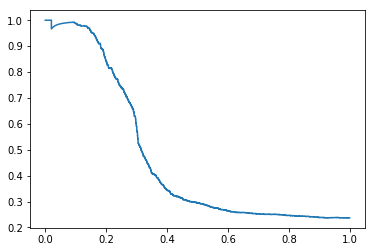

In [22]:
plt.plot( re, pr )

In [23]:
average_precision_score( test_y, predictions[:, 1] )

0.4679597884235961

In [24]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( test_y, predictions[:, 1] )

In [25]:
for line in zip( fpr, tpr, thres ):
    print( line )

(0.0, 0.0006915629322268327, 0.9999999999999913)
(0.0, 0.0024204702627939143, 0.9999999999999887)
(0.0, 0.0031120331950207467, 0.9999999999999885)
(0.0, 0.004149377593360996, 0.9999999999999882)
(0.0, 0.004495159059474412, 0.9999999999999876)
(0.0, 0.006224066390041493, 0.9999999999999873)
(0.0, 0.007261410788381743, 0.9999999999999867)
(0.0, 0.007952973720608575, 0.9999999999999865)
(0.0, 0.009681881051175657, 0.9999999999999849)
(0.0, 0.01037344398340249, 0.9999999999999847)
(0.0, 0.011410788381742738, 0.9999999999999827)
(0.0, 0.012102351313969572, 0.9999999999999822)
(0.0, 0.014177040110650069, 0.9999999999999802)
(0.0, 0.015560165975103735, 0.9999999999999796)
(0.0, 0.020055325034578148, 0.9999999999998941)
(0.00021461530207103768, 0.020055325034578148, 0.9999929302068643)
(0.00021461530207103768, 0.09508990318118948, 0.9069329928541361)
(0.0003219229531065565, 0.09508990318118948, 0.9033018486429384)
(0.0003219229531065565, 0.09993084370677732, 0.8795228728041073)
(0.000429230604

(0.37707908573881316, 0.5048409405255878, 0.2647354983216273)
(0.37707908573881316, 0.5055325034578146, 0.2646743856630175)
(0.37825946990020387, 0.5055325034578146, 0.26449198687869524)
(0.37825946990020387, 0.5062240663900415, 0.2644639287075863)
(0.379117931108488, 0.5062240663900415, 0.2642182160603277)
(0.379117931108488, 0.5065698478561549, 0.2642148874326705)
(0.37976177701470115, 0.5065698478561549, 0.2640940964815921)
(0.37976177701470115, 0.5069156293222683, 0.264089131986842)
(0.37986908466573666, 0.5069156293222683, 0.26407600994725966)
(0.37986908466573666, 0.5072614107883817, 0.2640123808170144)
(0.3800836999678077, 0.5072614107883817, 0.2639345615045235)
(0.3800836999678077, 0.5076071922544951, 0.2639140783684716)
(0.3801910076188432, 0.5076071922544951, 0.263891172394771)
(0.3801910076188432, 0.5079529737206085, 0.2638557965003751)
(0.3804056229209143, 0.5079529737206085, 0.2637919613772633)
(0.3804056229209143, 0.508298755186722, 0.2637907476835014)
(0.3816933147333405

(0.5833243910290804, 0.6521438450899032, 0.22073088451715348)
(0.5834316986801159, 0.6521438450899032, 0.22072871732648824)
(0.5834316986801159, 0.6524896265560166, 0.22067272146321262)
(0.5835390063311514, 0.6524896265560166, 0.220666197319994)
(0.5835390063311514, 0.65283540802213, 0.22065521991845383)
(0.5839682369352935, 0.65283540802213, 0.22055230144297577)
(0.5839682369352935, 0.6531811894882434, 0.22053450218914056)
(0.5842901598884, 0.6531811894882434, 0.22049933276498504)
(0.5842901598884, 0.6535269709543569, 0.22049905166988298)
(0.5848266981435777, 0.6535269709543569, 0.22042014555854114)
(0.5848266981435777, 0.6538727524204703, 0.22040290054928116)
(0.5849340057946132, 0.6538727524204703, 0.22039565821088547)
(0.5849340057946132, 0.6542185338865837, 0.22039365324629928)
(0.5853632363987552, 0.6542185338865837, 0.22036899892174727)
(0.5853632363987552, 0.6549100968188105, 0.22032544177822241)
(0.5858997746539328, 0.6549100968188105, 0.22023673278649356)
(0.5858997746539328,

(0.9396931001180384, 0.946058091286307, 0.11088349723741019)
(0.9399077154201094, 0.946058091286307, 0.11079193216286842)
(0.9399077154201094, 0.9467496542185339, 0.11071463437942795)
(0.9406588689773581, 0.9467496542185339, 0.1102634390023013)
(0.9406588689773581, 0.9470954356846473, 0.11024732273122136)
(0.9408734842794291, 0.9470954356846473, 0.11014705178229019)
(0.9408734842794291, 0.9477869986168741, 0.11009710039386376)
(0.9409807919304647, 0.9477869986168741, 0.11007551743266579)
(0.9409807919304647, 0.9481327800829875, 0.11004538395236502)
(0.9410880995815002, 0.9481327800829875, 0.10999175671804678)
(0.9410880995815002, 0.9484785615491009, 0.10995392920236019)
(0.9414100225346067, 0.9484785615491009, 0.10973535203056695)
(0.9414100225346067, 0.9488243430152143, 0.1096612173701511)
(0.9421611760918553, 0.9488243430152143, 0.10920964996235832)
(0.9421611760918553, 0.9491701244813278, 0.10903463024919219)
(0.9424830990449619, 0.9491701244813278, 0.10898428075719263)
(0.942483099

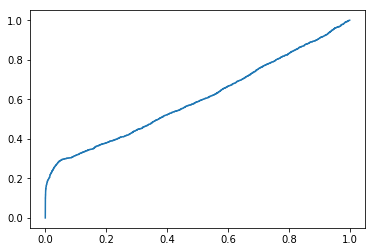

In [26]:
plt.plot( fpr, tpr )